# **Метод KNN для классификации. Контрольное задание.**

# **1. Подготовка исходных данных**

Сгенерировать исходные данные для обучения модели KNN.

Значения параметров выбираются из таблицы "Варианты".docx в соответствие с номером студента в списке группы в СДО.

In [32]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 251,
                           n_features = 4,
                           n_classes = 2,
                           n_informative = 4,
                           n_redundant = 0,
                           n_clusters_per_class = 1,
                           class_sep = 4.4,
                           random_state = 10)

Разделить выборку на тренировочную и тестовую.

Использовать параметр `random_state` в соответствие со своим вариантом.

In [33]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.DataFrame({'x': X[:,0], 'y': y})
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 10,
                                                    test_size = 0.2)

X_train.shape, X_test.shape


((200, 4), (51, 4))

Произвести масштабирование значений признаков.

In [34]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.fit_transform(X_test)

# **2. Метод KNN**

## Подбор оптимального количества ближайших соседей

Осуществить подбор количества ближайших соседей следующими способами:
- визуальный анализ зависимости оибки классификации от количества ближайших соседей;
- визуальный анализ валидационных кривых;
- поиск на сетке.

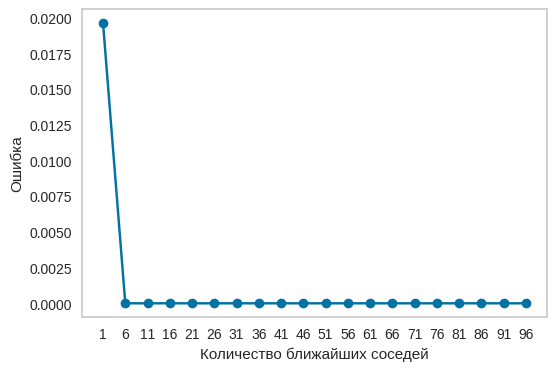

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = np.arange(1, 100, 5)
error_rates = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  error_rate = 1 - accuracy_score(y_test, y_pred)
  error_rates.append(error_rate)

plt.figure(figsize=(6,4))
plt.plot(k_values,error_rates, marker = 'o')
plt.xlabel('Количество ближайших соседей')
plt.ylabel('Ошибка')
plt.xticks(ticks = np.arange(1, 100, 5))
plt.grid()

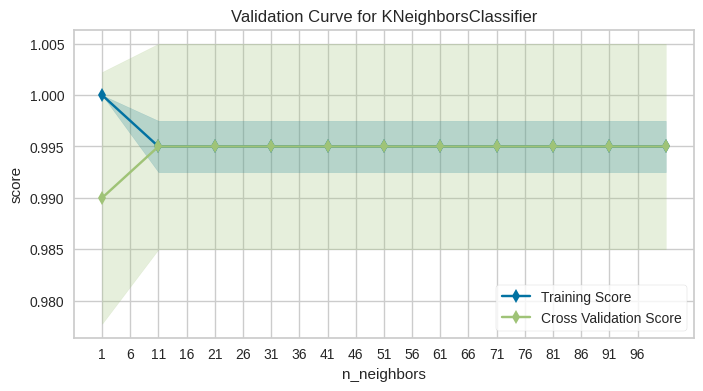

In [36]:
from yellowbrick.model_selection import ValidationCurve
import numpy as np
import matplotlib.pyplot as plt


viz = ValidationCurve (KNeighborsClassifier(),
                       param_name = 'n_neighbors',
                       param_range = np.arange(1, 110, 10),
                       CV = 5,
                       scoring = 'accuracy',
                       size = (800, 400),
                       n_jobs = -1)
viz.fit(X_train, y_train)

plt.xticks(ticks = np.arange(1, 101, 5))
viz.show();

In [37]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 100, 10)}
grid_search = GridSearchCV(knn, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
optimal_k = grid_search.best_params_['n_neighbors']
print(f'Оптимальное значение n_neighbors: {optimal_k}')

Оптимальное значение n_neighbors: 11


## Обучение модели

Обучить модель KNN с найденным оптимальным значением количества ближайших соседей на тренировочной выборке.

In [38]:
knn_base = KNeighborsClassifier(n_neighbors = 11)
knn_base.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

Вывести вероятности принадлежности объектов к классам для объектов тестовой выборки.

In [39]:
y_pred_proba = knn_base.predict_proba(X_test)
y_pred_proba[:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

Вывести предсказанные метки классов для объектов тестовой выборки.

In [40]:
y_pred = knn_base.predict(X_test)
y_pred[:5]

array([1, 0, 0, 1, 1])

## Оценивание качества модели

Построить матрицу ошибок.

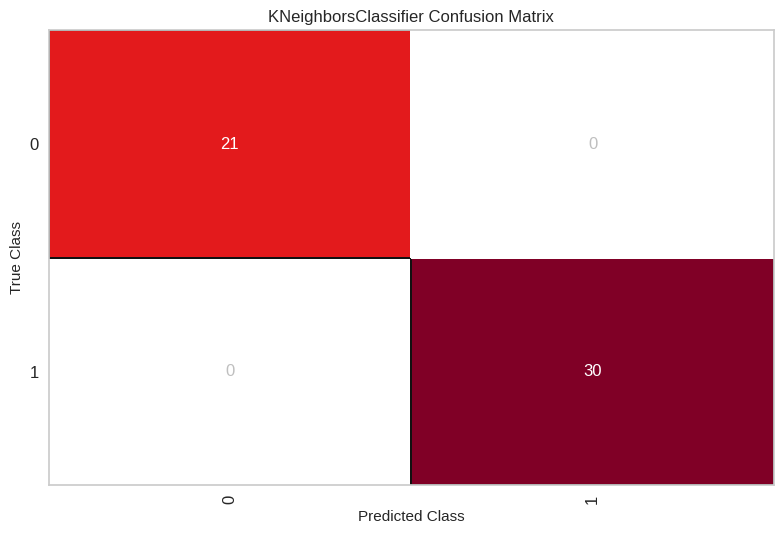

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [41]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_base)
cm.fit(X_train, y_train)
X_test = mm_scaler.fit_transform(X_test)
cm.score(X_test, y_test)
cm.show()

Вывести отчет о классификации.

In [42]:
from sklearn.metrics import classification_report
y_pred = knn_base.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        30

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



# **3. Метод взвешенных KNN**

## На основе расстояний

### Подбор оптимального количества ближайших соседей

Осуществить подбор количества ближайших соседей следующими способами:
- визуальный анализ зависимости оибки классификации от количества ближайших соседей;
- визуальный анализ валидационных кривых;
- поиск на сетке.

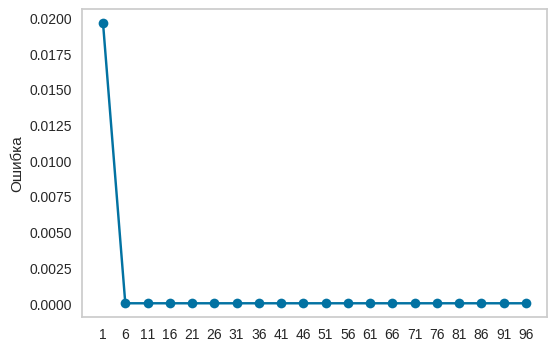

In [43]:
from sklearn.metrics import accuracy_score
k_values = np.arange(1, 100, 5)
error_rates = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors = k,
                             weights = 'distance')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  error_rate = 1 - accuracy_score(y_test, y_pred)
  error_rates.append(error_rate)

plt.figure(figsize = (6, 4))
plt.plot(k_values, error_rates, marker = 'o')
plt.ylabel('Ошибка')
plt.xticks(ticks = np.arange(1, 100, 5))
plt.grid()


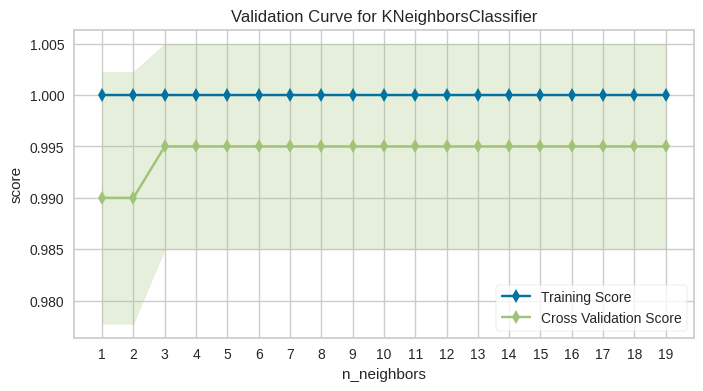

<Axes: title={'center': 'Validation Curve for KNeighborsClassifier'}, xlabel='n_neighbors', ylabel='score'>

In [44]:
viz = ValidationCurve(
    KNeighborsClassifier(weights = 'distance'),
    param_name = 'n_neighbors',
    param_range = np.arange(1, 20, 1),
    cv = 5,
    scoring = 'accuracy',
    size = (800, 400),
    n_jobs = -1
)
viz.fit(X_train, y_train)
plt.xticks(ticks = np.arange(1, 20, 1))
viz.show()

In [59]:
knn = KNeighborsClassifier(weights = 'distance')
param_grid = {'n_neighbors': range(1, 20, 1)}
grid_search = GridSearchCV(knn, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
optimal_k = grid_search.best_params_['n_neighbors']
print(f"Оптимальное значение n_neighbors: {optimal_k}")

Оптимальное значение n_neighbors: 3


### Обучение модели

Обучить модель взвешенных KNN с найденным оптимальным значением количества ближайших соседей на тренировочной выборке.

In [73]:
n_neighbors = 3
knn_wr = KNeighborsClassifier(n_neighbors = n_neighbors,
                              weights = 'distance')
knn_wr.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

Вывести вероятности принадлежности объектов к классам для объектов тестовой выборки.

In [74]:
y_pred_proba = knn_wr.predict_proba(X_test)
y_pred_proba[:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

Вывести предсказанные метки классов для объектов тестовой выборки.

In [75]:
y_pred = knn_wr.predict(X_test)
y_pred[:10]

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

### Оценивание качества модели

Построить матрицу ошибок.

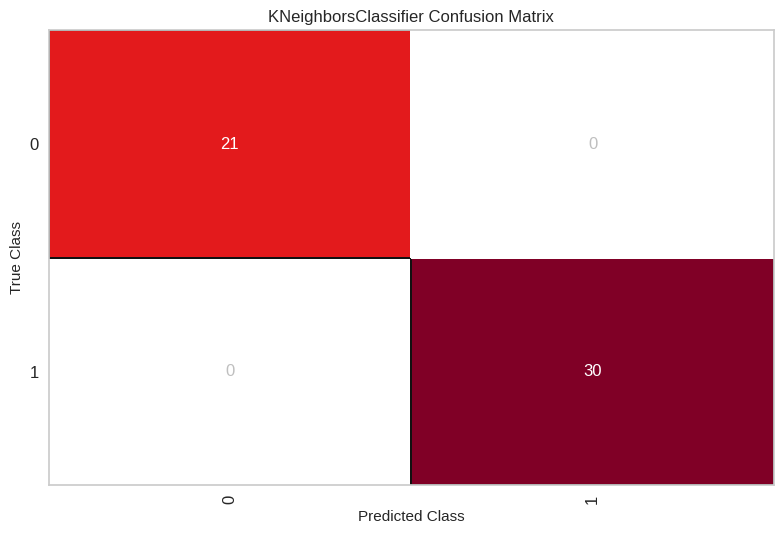

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [76]:
cmwr = ConfusionMatrix(knn_wr)
cmwr.fit(X_train, y_train)
X_test = mm_scaler.fit_transform(X_test)
cmwr.score(X_test, y_test)
cmwr.show()

Вывести отчет о классификации.

In [77]:
y_pred = knn_wr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        30

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



## На основе ядерных функций

Выбрать ядерную функцию и создать класс, реализующий классификацию объектов методом взвешенных K-ближайших соседей на основе выбранной ядерной функции.

In [78]:
from scipy.spatial.distance import cdist

class ParzenWindowClassifier:
  def __init__(self, h = 1.0):

    self.h = h
    self.X_train = None
    self.y_train = None

  def fit(self, X, y):
    self.X_train = np.array(X)
    self.y_train = np.array(y)

  def _gaussian_kernel(self, distances):

    return np.exp(-0.5 * (distances / self.h) ** 2)

  def predict(self, X):

    predictions = []

    for x in X:
      distances = cdist([x], self.X_train)[0]

      weights = self._gaussian_kernel(distances)

      class_votes = {}
      for weight, label in zip(weights, self.y_train):
        if label not in class_votes:
          class_votes[label] = 0
        class_votes[label] += weight

      predicted_class = max(class_votes, key = class_votes.get)
      predictions.append(predicted_class)

    return np.array(predictions)


Подобрать ширину окна.

In [79]:
acc = []
for h in [0.1, 0.5, 1, 5]:
  classifier = ParzenWindowClassifier(h)
  classifier.fit(X_train, y_train)
  predictions = classifier.predict(X_test)
  ac = accuracy_score(y_test, predictions)
  acc.append(ac)

  h = [0.1, 0.5, 1, 5]

  for hh, ac in zip (h, acc):
      print(f"Ширина окна {hh}: accuracy = {ac}")

Ширина окна 0.1: accuracy = 1.0
Ширина окна 0.1: accuracy = 1.0
Ширина окна 0.5: accuracy = 1.0
Ширина окна 0.1: accuracy = 1.0
Ширина окна 0.5: accuracy = 1.0
Ширина окна 1: accuracy = 1.0
Ширина окна 0.1: accuracy = 1.0
Ширина окна 0.5: accuracy = 1.0
Ширина окна 1: accuracy = 1.0
Ширина окна 5: accuracy = 0.4117647058823529


### Обучение модели

Обучить модель взвешенных KNN с найденным оптимальным значением ширины окна на тренировочной выборке.

In [80]:
classifier = ParzenWindowClassifier(h = 0.1)
classifier.fit(X_train, y_train)

Вывести вероятности принадлежности объектов к классам для объектов тестовой выборки.

In [84]:
import sklearn
y_pred_proba = classifier.predict(X_test)
y_pred_proba[:5]

array([1, 0, 0, 1, 1])

Вывести предсказанные метки классов для объектов тестовой выборки.

In [69]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1])

### Оценивание качества модели

Построить матрицу ошибок.

In [72]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[21  0]
 [ 0 30]]


Вывести отчет о классификации.

In [57]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58        21
           1       0.00      0.00      0.00        30

    accuracy                           0.41        51
   macro avg       0.21      0.50      0.29        51
weighted avg       0.17      0.41      0.24        51



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
acc

[1.0, 1.0, 1.0, 0.4117647058823529]